In [2]:
# (tf1) 가상머신에서 jupyter 실행할 것
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

    http://hunkim.github.io/ml/
    
    
    Linear Regression 의 개념 슬라이드
    
        우리가 그동안 했던 선형 방식의 가중치를 구하는 식도 있다. 
    
    Linear Regression 의 Lab슬라이드
        텐서플로우로 어떻게 구현하였나.
    

# 단순 선형 회귀 모델
    
    

In [3]:
# 데이터 준비

# 입력 값
x_train = [1,2,3]

# 결과값
y_train = [1,2,3]


    이럴 경우 어떻게 해야 wx +b 식이 되느냐  
    
    w = 1일 것이고
    b = 0일 것이다.  
    
    다만 텐서플로우에서는 어떻게 이 값을 찾는지 알아 볼 것이다.

In [4]:
# W 값이 얼마가 될 지 모르기 때문에 우선 임시로 잡는다
# place holder 사용 
W = tf.placeholder(tf.float32)

In [5]:
# 가설 준비를 해야한다.
# 뭐 지금은 단순해서 괜찮지만 나중에 다중회귀 모델일 땐 복잡해진다.

# 가설 : Wx + b  일 것이다.

hypot = W * x_train  

    지도 방식으로 정답을 알려주기로 한다. 
    (비용함수 준비) - 실제 정답과 예측이 얼마나 차이가 나는가 

In [8]:
# 비용함수
cost = tf.reduce_mean(tf.square(hypot - y_train))
# reducemean : 평균 구하는 함수
# square : 제곱

    여기까지 한 작업이 텐서플로우를 이용하기 위한 그래프를 준비한 과정이다.

74.666664
70.98
67.386665
63.88667
60.479992
57.166668
53.946674
50.819996
47.78667
44.84666
42.0
39.246666
36.586662
34.020004
31.546667
29.166666
26.88
24.686666
22.58667
20.58
18.666666
16.846666
15.12
13.486667
11.946668
10.5
9.146666
7.886667
6.72
5.646666
4.6666665
3.78
2.986667
2.2866664
1.68
1.1666666
0.7466666
0.42000008
0.18666662
0.04666671
0.0
0.04666671
0.18666674
0.41999987
0.7466665
1.1666666
1.6800003
2.2866673
2.986666
3.7799995
4.6666665
5.646666
6.720001
7.8866653
9.146668
10.5
11.946666
13.486669
15.119998
16.84667
18.666666
20.579996
22.58667
24.686666
26.880005
29.166666
31.546661
34.020004
36.586662
39.24667
42.0
44.84666
47.786663
50.820007
53.946674
57.166668
60.479992
63.886658
67.386665
70.98


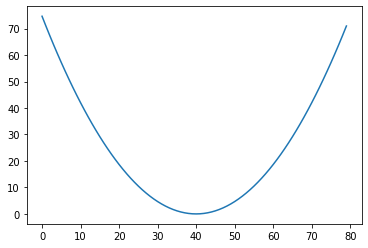

In [11]:
# 비용함수를 그래프로 그리기 
sess = tf.Session()

cost_val = []
for i in range(-30, 50) :
    cost_result = sess.run(cost, feed_dict={W:i*0.1})  #여기서 곱해준 숫자는 학습률이다. 
    print(cost_result)
    cost_val.append(cost_result)



plt.plot(cost_val)
sess.close()

    [가중치가 어떻게 비용을 계산하는지만 보여준 그래프]
    
    비용에 대한 결과이다. 
    비용이 제일 낮은 지점...
    즉 0이 되는 부분이 우리가 찾던건데 
    
    0 이후에 다시 올라가기 시작함을 알 수 있다. (반복횟수를 많이 했기 때문)
    
    
    현재위치에서 최소점을 찾아가는 방법 - 경사 하강법(Gradient Descent) 알고리즘    
        - 폭을 얼마나 하느냐에 따라 성능이 달라짐. 
        - 이게 learning rate인데 아까 곱해준 소수점이 learning rate이다 .
        - feed_dict={W:i*0.1}  이 부분에서 0.1이 학습률이다. 

    

#### 경사하강 알고리즘을 이용한  가중치 학습


In [17]:
# 데이터 준비  (위와 같은 데이터)

# 입력 값
x_train = [1,2,3]

# 결과값
y_train = [1,2,3]

# 가설  Wx+b

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "Weight")  
# Variable  클래스 
# 초기값을 무엇을 줄 것인가가 중요한데 잘 모르기 때문에 Random으로 쓴다.
# random_nomal : 랜덤하게 값을 뽑는 함수 [1]은 한개만, 
# 그래프에서 점점 내려가면서 값을 찾아야 하는데 초기 시작을 어디로 하냐에 따라 성능 차이도 난다.


b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "bias")  


# 가설 준비(기본 단순 선형 모델)
hypothsis = W * x_train + b

# 비용함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y_train))

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
# Linear Regression cost 함수 최소화 강의슬라이드 참고

learning_rate = 0.1
gradient = tf.reduce_mean((W * x_train - y_train) * x_train)
descent = W - learning_rate * gradient
update = W.assign(descent)  
#텐서플로우에서는 W = W+b  이렇게 안되기 때문에 함수를 써야한다. 

    Gradient descent 알고리즘
    
        descent = W - learning_rate * gradient 
        
        learning_rate = 0.1
        gradient = tf.reduce_mean((W * x_train - y_train) * x_train)  --- 기울기값(즉 미분)?
        x_train : 입력값. 
        
    
--------------------------------------------------------------------
    여기까지가 Graph 작업 완료이다. 
    이제 Tensor Board에 그려보자. 

In [19]:
# 그리기
sess = tf.Session()

#구동
sess.run(tf.global_variables_initializer())
# 예전버전에선 initailize_어쩌구
# 최신버전에선 global_variables_initializer()

for step in range(21) :
    _, c, w = sess.run([update, cost, W])  
    # 여러개를 실행시킬 것이기 때문에 리스트로 여러개 묶어서 실행// 원래는 update만 실행해도 된다.
    # _. 이렇게 해서 update값은 무시한다. 
    
    print(step, c, w)
    
sess.close()

0 3.3118637 [0.11318511]
1 0.6399279 [0.5270321]
2 1.5127586 [0.74775046]
3 2.631883 [0.8654669]
4 3.4146655 [0.928249]
5 3.885033 [0.9617328]
6 4.150938 [0.97959083]
7 4.297033 [0.9891151]
8 4.376167 [0.99419475]
9 4.418718 [0.99690384]
10 4.4415107 [0.9983487]
11 4.453694 [0.99911934]
12 4.460201 [0.9995303]
13 4.4636726 [0.9997495]
14 4.4655247 [0.99986637]
15 4.4665127 [0.9999287]
16 4.46704 [0.999962]
17 4.4673214 [0.99997973]
18 4.4674716 [0.9999892]
19 4.4675517 [0.9999943]
20 4.4675946 [0.99999696]


    결과를 보면 난수이기 때문에 랜덤으로 시작점이 잡힌다.
    
    그래도 20번까지 진행이 되기 때문에 0으로 근접해가기 시작한다. 

#### 만약 주어지지 않은 데이터가 주어지지 않는다면?

In [21]:
x_train = tf.placeholder(tf.float32, shape=[None])
# 몇개가 넘어가는지 조차 모름... 하나인지 두개인지는 그래도 알려줘야 한다.
# shape이라는 옵션이 있음. shape = [숫자] // 숫자가 데이터 갯수 
# 그런데 갯수마저 모를땐 어떻게 하는가. 그럴땐 [None]이라고 한다.

# 결과값도 없다.
y_train = tf.placeholder(tf.float32, shape=[None])

# 가설  Wx+b
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "Weight")  
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "bias")  

###### graph 작업 끝####


## tensor보드에 구현
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21) :
    _, c, w = sess.run([update, cost, W], feed_dict = {x_train:[1,2,3,4], y_train:[1,2,3,4]})      
    print(step, c, w)
    
sess.close()

0 13.860026 [-0.06301905]
1 4.330465 [-0.06301905]
2 1.4546412 [-0.06301905]
3 0.5485266 [-0.06301905]
4 0.24379909 [-0.06301905]
5 0.13206069 [-0.06301905]
6 0.08691182 [-0.06301905]
7 0.06694118 [-0.06301905]
8 0.057458878 [-0.06301905]
9 0.052734125 [-0.06301905]
10 0.050308805 [-0.06301905]
11 0.04904219 [-0.06301905]
12 0.048374314 [-0.06301905]
13 0.048020314 [-0.06301905]
14 0.047832068 [-0.06301905]
15 0.047731888 [-0.06301905]
16 0.04767849 [-0.06301905]
17 0.047650088 [-0.06301905]
18 0.04763489 [-0.06301905]
19 0.047626834 [-0.06301905]
20 0.04762249 [-0.06301905]


    Gradient 를 구현해서 해보았는데
    
    tensorflow에는 당연히 이걸 해주는 함수가 있었다.
    
    tf.train.GradientDescentOptimizer(learning_rate= 0.1) 
    
    

In [34]:
# 위의 코드 Gradient 함수를 써서 사용
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "Weight")  
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "bias")  

#가설
hypothsis = W * x_train + b

# 비용함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y_train))

# 최저비용학습을 위한 경사 하강 알고리즘(Gradient Descent Algorithm)
# Linear Regression cost 함수 최소화 강의슬라이드 참고

learning_rate = 0.1
gradient = tf.reduce_mean((W * x_train - y_train) * x_train)
descent = W - learning_rate * gradient
update = W.assign(descent)  

optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.005)
train = optimizer.minimize(cost) 

## tensor보드에 구현
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50) :
    _, c, w = sess.run([train, cost, W], feed_dict = {x_train:[1,2,3,4], y_train:[1,2,3,4]})      
    print(step, c, w)
    
sess.close()

0 21.826294 [-0.44083512]
1 18.333689 [-0.32364467]
2 15.400019 [-0.21623528]
3 12.935829 [-0.11779024]
4 10.865993 [-0.027561]
5 9.127397 [0.05513847]
6 7.667034 [0.13093692]
7 6.440377 [0.20041063]
8 5.4100246 [0.2640877]
9 4.5445623 [0.32245216]
10 3.8176026 [0.37594762]
11 3.206979 [0.42498067]
12 2.6940746 [0.4699239]
13 2.2632515 [0.5111189]
14 1.901373 [0.54887855]
15 1.5974061 [0.5834897]
16 1.3420835 [0.61521536]
17 1.1276197 [0.64429635]
18 0.9474767 [0.6709536]
19 0.7961614 [0.6953894]
20 0.66906065 [0.7177893]
21 0.5622993 [0.7383233]
22 0.4726225 [0.75714713]
23 0.3972962 [0.7744037]
24 0.33402348 [0.7902238]
25 0.28087583 [0.8047274]
26 0.2362324 [0.8180244]
27 0.19873248 [0.8302156]
28 0.16723296 [0.84139323]
29 0.1407736 [0.851642]
30 0.1185477 [0.8610395]
31 0.09987755 [0.86965674]
32 0.08419451 [0.8775589]
33 0.07102036 [0.8848056]
34 0.059953645 [0.8914517]
35 0.05065707 [0.8975473]
36 0.042847253 [0.90313834]
37 0.03628648 [0.9082669]
38 0.030774768 [0.9129717]
39 0

In [35]:
# 위의 코드 Gradient 함수를 써서 사용
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "Weight")  
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "bias")  

#가설
hypothsis = W * x_train + b
# 비용함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y_train))

learning_rate = 0.1
gradient = tf.reduce_mean((W * x_train - y_train) * x_train)
descent = W - learning_rate * gradient
update = W.assign(descent)  

optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.01)
train = optimizer.minimize(cost) 

## tensor보드에 구현
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001) :
    _, curr_c, curr_w, curr_b = sess.run([train, cost, W, b], feed_dict = {x_train:[1, 2, 3, 4, 5], 
                                                                           y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})      
    
    # 100번에 한번
    if step % 100 == 0 :
        print(step, curr_c, curr_w, curr_b)
    


0 81.010315 [-0.55109435] [-0.76832104]
100 0.16619617 [1.2637775] [0.14767945]
200 0.084422216 [1.1879991] [0.42126366]
300 0.042883765 [1.1339904] [0.61625195]
400 0.021783544 [1.0954974] [0.7552239]
500 0.011065314 [1.0680627] [0.85427207]
600 0.0056208186 [1.0485095] [0.9248651]
700 0.0028551947 [1.0345737] [0.975178]
800 0.0014503434 [1.0246412] [1.0110373]
900 0.000736726 [1.0175622] [1.0365945]
1000 0.0003742324 [1.012517] [1.0548099]
1100 0.00019009321 [1.0089209] [1.0677925]
1200 9.656549e-05 [1.0063583] [1.0770446]
1300 4.9054273e-05 [1.0045317] [1.0836389]
1400 2.4918167e-05 [1.0032299] [1.0883391]
1500 1.26566065e-05 [1.0023019] [1.0916895]
1600 6.4283217e-06 [1.0016406] [1.094077]
1700 3.2651665e-06 [1.0011693] [1.0957786]
1800 1.6593576e-06 [1.0008335] [1.0969907]
1900 8.429126e-07 [1.0005941] [1.097855]
2000 4.2852494e-07 [1.0004237] [1.0984709]


    w값도 1이되고
    b값도 1.1이 되어간다 .

In [37]:
# Testing  예측해보기
print(sess.run(hypothsis, feed_dict={x_train:[27]}))
print(sess.run(hypothsis, feed_dict={x_train:[2.5, 3.7]}))
sess.close()

[28.10991]
[3.59953   4.8000383]


    x_train에 값을 넣어보면 근사값이 나오는 것을 확인 해볼 수 있다.

In [58]:
# 아래의 데이터를 가지고 하루 8시간을 일했을때 매출액이 얼마인지 예측하시오
X = [1, 2, 3, 4, 5, 6, 7]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

x_test = tf.placeholder(tf.float32, shape=[None])
y_test = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "Weight")  
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name = "bias")  

#가설
hypothsis = W * x_test + b
# 비용함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y))

learning_rate = 0.1
gradient = tf.reduce_mean((W * x_test - y_test) * x_test)
descent = W - learning_rate * gradient
update = W.assign(descent)  

optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(cost) 

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print("no      c           w            b")
for step in range(1001) :
    
    _, curr_c, curr_w, curr_b = sess.run([train, cost, W, b], feed_dict={x_test:X, y_test:y})      
    
    # 100번에 한번
    if step % 100 == 0 :
        print(step, curr_c, curr_w, curr_b)
      
        
        
print("8시간 예측값 :",sess.run(hypothsis, feed_dict={x_test:[8]}))     
sess.close()


no      c           w            b
0 13455991000.0 [1036.3176] [206.89165]
100 13768416.0 [24602.78] [4824.5586]
200 10858895.0 [24964.727] [4761.6143]
300 10693585.0 [24994.91] [4636.8047]
400 10541025.0 [25019.416] [4515.791]
500 10399758.0 [25042.936] [4399.3286]
600 10268949.0 [25065.568] [4287.2603]
700 10147821.0 [25087.346] [4179.4204]
800 10035662.0 [25108.299] [4075.6484]
900 9931810.0 [25128.465] [3975.7917]
1000 9835635.0 [25147.873] [3879.7017]
8시간 예측값 : [205062.69]


# 다중 선형 회귀 모델


    http://hunkim.github.io/ml/
    
    여러개의 입력 Linear Regression - Lab 슬라이드
    
    Hypothesis가 Multi 일경우

        H = W1X1 + W2X2 + W3X3 + .....+ b

        이럴 경우 행렬 곱을 이용해서 해결한다.


    Matrix multiplication
    
        행렬 곱셈의 경우  행x열의 합이 하나의 값이 된다. 
        
    Hypothesis using matrix 
    
        행렬곱과 Hypothesis와의 관계를 보여줌 
        
                 X           *      W           =                  XW    
                     
        | x11  x12  x13 |                             | x11w11 +  x12w21 + x13w31 |
        | x21  x22  x23 |        | w11 |              | x21w11 +  x22w21 + x23w31 |
        | x31  x32  x33 |    *   | w21 |        =     | x31w11 +  x32w21 + x33w31 |
        | x41  x42  x43 |        | w31 |              | x41w11 +  x42w21 + x43w31 |
        | x51  x52  x53 |                             | x51w11 +  x52w21 + x53w31 |
        
        
        

#### 1차원일 때 단순하게 처리

In [62]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

In [71]:
# 1차원일 때 단순하게 처리

X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])

y = tf.placeholder(tf.float32, shape=[None])


# 가중치
W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))


# 가설
hypothesis = W1*X1 + W2*X2 + W3*X3 + b

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - y))

# 최소비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)


with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001) :
        _, hy, co= sess.run([train, hypothesis, cost], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, 
                                                                  y:y_data})  # 보고싶은 것을 리스트로 묶어서
        
        if step % 100 == 0 :
            print(step, hy, co)
            


0 [-272.49023 -318.43463 -318.2171  -347.34143 -240.30005] 224646.38
100 [148.15076 186.96738 179.85617 195.03804 145.15846] 5.921837
200 [148.24202 186.90472 179.88405 195.05885 145.07571] 5.6219225
300 [148.33084 186.84377 179.91118 195.07913 144.99518] 5.3378353
400 [148.41728 186.78444 179.93758 195.09888 144.91676] 5.0687037
500 [148.50142 186.7267  179.96327 195.11813 144.84047] 4.8137727
600 [148.5833  186.67049 179.98827 195.13684 144.76619] 4.5722733
700 [148.66298 186.61581 180.01262 195.15508 144.6939 ] 4.3435364
800 [148.74052 186.5626  180.03627 195.17285 144.62352] 4.1268535
900 [148.81598 186.5108  180.05933 195.19016 144.55501] 3.9215903
1000 [148.8894  186.46039 180.08173 195.207   144.48834] 3.7271829
1100 [148.96088 186.41133 180.10355 195.2234  144.42343] 3.5429943
1200 [149.03041 186.3636  180.12477 195.2394  144.36024] 3.3685424
1300 [149.09811 186.31714 180.14543 195.25497 144.29877] 3.203268
1400 [149.16399 186.27193 180.16551 195.27016 144.2389 ] 3.0467083
1500

    nan값이 뜬거면 학습 범위가 넘어섰음(learning_rate가 높아서 폭이 커졌기 때문이라던지)
    
    그런데 x1_data, x2_data, x3_data
    
    이게 1차원 데이터이기 때문에
    
    2차원 데이터로 바꿔야 우리가 하는 행렬 계산이 가능하다.

#### 2차원일 때 계산

In [73]:
# 1차원 배열 2차원 ...
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

In [74]:
# 위랑 코드가 똑같다. 다만 수정해야할 것은 변수들을 행렬로 바꿔줘야한다.


# X = tf.placeholder(tf.float32, shape=[5, 3])
# y = tf.placeholder(tf.float32, shape=[None,1])
# 그런데 상수값을 고정시켜놓기 그렇기 때문에 
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None,1])



W = tf.Variable(tf.random_normal([3,1]))   
#X가 [5,3]이니까 5개로 들어와서 출력이 3개이다. 
#그래서 W값이 [3,] 이고  출력이 b = 1개 이므로  [3, 1] 이 된다.
b = tf.Variable(tf.random_normal([1]))

# 멀티 식을 잘 생각해봐라 


# 가설
hypothesis = tf.matmul(X,W) + b
# matmul : 행렬 곱

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - y))

# 최소비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)


with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001) :
        _, hy, co= sess.run([train, hypothesis, cost], feed_dict={X:x_data, y:y_data})  # 보고싶은 것을 리스트로 묶어서
        
        if step % 100 == 0 :
            print(step, hy, co)
            

0 [[100.72239]
 [112.17811]
 [115.38905]
 [121.96963]
 [ 86.44638]] 4134.7393
100 [[157.54024]
 [180.73167]
 [182.7989 ]
 [195.39853]
 [138.7832 ]] 13.491251
200 [[157.40443]
 [180.82425]
 [182.75662]
 [195.37328]
 [138.90019]] 12.849072
300 [[157.27219]
 [180.91435]
 [182.71541]
 [195.3488 ]
 [139.01395]] 12.240497
400 [[157.1434 ]
 [181.00209]
 [182.67528]
 [195.32509]
 [139.1246 ]] 11.663678
500 [[157.018  ]
 [181.08751]
 [182.63615]
 [195.3021 ]
 [139.23222]] 11.116987
600 [[156.89594]
 [181.17068]
 [182.59805]
 [195.27985]
 [139.33691]] 10.598872
700 [[156.77704]
 [181.25166]
 [182.56096]
 [195.2583 ]
 [139.43872]] 10.10778
800 [[156.66125]
 [181.33047]
 [182.52478]
 [195.23738]
 [139.5377 ]] 9.6423435
900 [[156.54855]
 [181.40724]
 [182.48958]
 [195.2172 ]
 [139.63402]] 9.201181
1000 [[156.43875]
 [181.48195]
 [182.45525]
 [195.1976 ]
 [139.72763]] 8.782988
1100 [[156.33186]
 [181.55472]
 [182.42183]
 [195.17867]
 [139.81873]] 8.386563
1200 [[156.22774]
 [181.62555]
 [182.38922]


    2000번이 가까워질수록 y값과 거의 맞아가는 것을 확인할 수 있다.

# Dask  : 패키지 (파이썬)

    가상 데이터를 생성하는 패키지
    
    - 가상 데이터 프레임이다.
    - 병렬 처리용 작업 스케쥴러
    
    
    데이터를 한번에 불러오면 메모리에 부담을 주기 때문에
    
    준비만 하는 것이다.
    
    
    
    

In [77]:
%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting data/sample1.csv


In [78]:
df1 = pd.read_csv("data/sample1.csv")
df1
df1[" c2"].mean()

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


    이 방식은 메모리에 올려놓고 사용하는 것이다.
    
    만약 이게 엄청 큰 데이터 였으면 아마 메모리에서 불러오지 못했을 것이다.
    
    우리가 항상 하던 방식이었다.

#### Dask 사용

In [79]:
import dask.dataframe as dd

df2 = dd.read_csv("data/sample1.csv")
df2


,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


    값은 없고 틀만 있다.
    
    이걸 보니 tensorflow 방식이 생각난다.
    
     from-delayed, 3 tasks 라는 결과로 불러올 값이 3개 있다고 알려주고
     
    준비만 된 상태라는 것.

In [81]:
df2.head()

C:\Users\acorn\Anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


    내가 값을 사용하게 되는 순간 그 때 값을 불러오게 됨.
    
    지금은 데이터가 작아서 다 보여준다.
    
    다만 수십만개라면 일부만 올려서 사용

In [82]:
df2[" c2"].mean()

dd.Scalar<series-..., dtype=float64>

    평균을 계산해봤더니
    
    이 경우에는 값이 안나온다. 왜?? 객체는 생성이 된거 같은데..
    
    
    이럴 경우에는 불러오는 함수까지 써야 값을 불러온다.
    .compute()

In [83]:
df2[" c2"].mean().compute()

2.22

#### 큰 데이터 불러와 보기 : 병렬처리
    cpu의 코어를 더 사용해서 

In [90]:
df3 = dd.read_csv("data/crime.csv", dtype=str, error_bad_lines = False, warn_bad_lines = False)

In [91]:
df3
df3.tail()
df3.count().compute()

ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [92]:
# 기다리기 지루할 수도 있어서 진행표시기를 사용해볼 수도 있다.

from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()  # pbar를 이용해서 진행바를 표시함 

In [87]:
# 걸린 시간을 재려면 time을 이용한다.

In [93]:
%%time
df3.count().compute()

[########################################] | 100% Completed | 31.8s
Wall time: 31.8 s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [95]:
# cpu를 몇개 사용할 것인가
%%time
df3.count().compute(scheduler = "processes", num_workers = 4)

# numworkers가 cpu갯수이다

UsageError: Line magic function `%%time` not found.


In [97]:
# 기존 df2 가공 처리
(df2["c1"] + 3).compute()

[########################################] | 100% Completed |  0.1s


0    4
1    5
2    6
Name: c1, dtype: int64

In [98]:
# 주의점  pandas처럼 이렇게 집어 넣을 수 없다.
# df2 = df2["c1"]-3

# dask는 이렇게 해야한다.
df2 = df2.assign(c1=df2["c1"]-3)

In [99]:
df2  # 그냥 사용하면 안나요죠?

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [100]:
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\acorn\Anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,-2,1.11,one
1,-1,2.22,two
2,0,3.33,three


In [101]:
# 새로운 컬럼 추가 
df2 = df2.assign(title = df2["c1"].astype(str) + "%")

In [102]:
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\acorn\Anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3,title
0,-2,1.11,one,-2%
1,-1,2.22,two,-1%
2,0,3.33,three,0%


In [103]:
%%writefile "data/sample2.csv"
c1, c2, c3
4, 4.11, one
5, 5.22, two
6, 6.33, three

Writing data/sample2.csv


In [104]:
# 복수데이터
df4 = dd.read_csv("data/sample*.csv")
df4.count().compute()

[########################################] | 100% Completed |  0.1s


c1     6
 c2    6
 c3    6
dtype: int64

# Queue Runners : First In First out


### 위의 Dask와 같은 원리이다
    한대의 컴퓨터에서 큰 데이터를 불러올 때 효율적으로 불러오기 위함
    
    한대 컴터에서 처리하는 방법이 여러가지 있다.
    
    단순 파이썬으로 작업할 땐 Dask를 사용하면 되지만 tensor에서는 그걸 해주는 함수가 또 따로 있다. 
    
    tf.train.string_input_producer([])  
    
    
    이게 파일 목록만 불러오는 것.. 그래서 대용량이라도 그냥 불러와놓기만 한다.
    목록은 어차피 여러개이므로 리스트로 받아옴

In [115]:
# 목록만 불러오기  

# 성적 데이터 
filename_queue = tf.train.string_input_producer(["data/data-01-test-score1.csv"])

# 실제로 불러오기 
key, value = tf.TextLineReader().read(filename_queue)

# 메모리에 있는 것을 실질적인 형태로 decoding 하기
xy = tf.decode_csv(value, record_defaults = [[0.], [0.], [0.], [0.]])
# record_defaults : 기본 값, 2차원형태의 숫자형으로 쓰겠다는 의미  
# [0.] 4개 인 이유는 우리가 열 데이터를 보면 숫자 4개 형태로 있기 때문

In [106]:
xy

[<tf.Tensor 'DecodeCSV:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:2' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:3' shape=() dtype=float32>]

    심지어 이것도 데이터를 바로 불러온게 아니다.
    
    데이터를 쓸 준비만 해둔 것.

#### tr.train.batch

    batch 는 모아서 한번에 처리하는,  일괄 처리를 의미
    
    
    batch 처리방식으로 세가지의 방법론이 있음
    
        - Batch(기본) : 전체 데이터를 모아서 다 가져오는 것   (메모리가 충분하거나 부담이 전혀 없을 때)
        - Stochastic  : 한개의 데이터
                1000개의 데이터를 쓸 때 하나씩 가져와서 쓰고 싶을 때 - 1000번 처리해서 할 때도
                
        - Mini-Batch  : Batch + Stochastic의 절충안 // 적당한 갯수를 우리가 지정
        
                   epoch (에폭)  : 전체의 훈련셋을 반복해서 훈련하는 횟수 
                   
                   (40개 배치가 한 세트) * 1000번 반복 = 4만번(에폭)
                        

In [117]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)  
# xy[0:-1] : 첫번째부터 마지막 컬럼 전까지  ---->  train_x_batch
# xy[-1:] : 마지막 컬럼만  ----> train_y_batch
# batch_size : 몇개씩 읽을 것인가 10개씩  1로하면 전체, 최대값을 하면 하나씩임
                

In [118]:
# 위 데이터로 해보기 
X = tf.placeholder(tf.float32, shape=[None, 3])  
y = tf.placeholder(tf.float32, shape=[None, 1])
# None이라고 한 이유는 데이터 입력이 달라질 수도 있기 때문이다. 


# 가중치
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))


# 가설  #지금은 입력값이 25개인데 각각에 가중치를 줄 수가 없기 때문에
hypothesis = tf.matmul(X, W) + b

# 비용값
cost = tf.reduce_mean(tf.square(hypothesis - y))

# 훈련값
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

    여기까지가 그래프 작업
    

In [122]:
# 세션 생성
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    # 코디네이터 : 실제로 불러오기 위함
    coord = tf.train.Coordinator()
    
    # 이 코디네이터한테 일을 시키는 것이다.
    threads = tf.train.start_queue_runners(sess = sess, coord = coord)
    # sess : session이 누군지 알려주고
    # coord : coordinater가 누군지 알려주면 된다.
    
    
    for step in range(2001) :
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])  # 10개씩 꺼내오는 걸 잊지마라.
        sess.run(train, feed_dict={X:x_batch, y:y_batch})
        # feed_dict할 때 10개씩 끊어서 가져오는 데이터를 넘겨주면 된다. 이렇게 분할 처리가 가능
        
    coord.request_stop()
    coord.join(threads)
#         *threads 밑에 설명 참고

    print("당신의 성적은 ", sess.run(hypothesis, feed_dict={X:[[100, 70, 101]]})) 
    print("다른 사람의 성적은 ", sess.run(hypothesis, feed_dict={X:[[60, 70, 110], [90, 100, 81], [60, 50, 70]]})) 
        # 저 점수일 때 예측 값은 
        
        
        
    

당신의 성적은  [[187.9025]]
다른 사람의 성적은  [[196.64465]
 [171.9934 ]
 [129.85088]]


### 스레드 : 프로그래밍 한다면 꼭 공부해야되죠 

    프로세스 : 
        하나의 프로그램이 실행되는 단위
    
        프로세스가 여러개 실행이 가능한게 윈도우의 특징이죠
    
    스레드 :
        하나의 프로세스 안에서 실행되는 작업 단위
        
        핸드폰으로 보면  다운로드 받으면서 웹서핑하면서 노래들을 수 있는 것들이
        
        각각 개별적인 스레드가 여러개 실행되어서 가능 
        
    
    싱글 스레드 : 하나의 작업이 끝날 때까지 기다렸다가 다 끝나면 다음작업이 순차적으로 실행
    멀티 스레드 : 여러작업이 동시에 실행
                    *실제로는 동시에 실행되진 않는다... 여러 작업이 번갈아가면서 진행되다 보니 여러개 되는거 같이 보임 (????)
                    
                    
    위에서 join이라는게 끝난 스레드가 나머지 스레드가 끝날 때까지 기다리는 것. 

# 로지스틱 회귀모델

    sklearn에서는 입력데이터는 1차원, 결과값도 1차원이였는데
    tensorflow에서는 2차원이라는것에 주목
    
    http://hunkim.github.io/ml/lec5.pdf
    
    자료를 보면
    
    Sigmoid 함수가 있는데 이런것을 이용하는 함수라는 것이다. 
    
    그래서 공식도 방금 전 회귀모델과는 다른 식이 된다
    
    회귀 : Wx+b
    로지스틱 : 시그모이드  1 / (1 + e^(-(W^t * X))
    
    
    
    로지스틱의 경우는 1과 0일 때 이진 분류인데
    
    1일때와 0일때 구하는 계산 식이 다르다. 
    
    근데 이걸 매번 구분해서 조건문으로 해줘야하나?  너무 불편하다.
    
    ** 그래서 하나로 식을 만들었다.  - pdf 참고  
    
    위 식이 우리가 세울 가설 공식이다. 
    
    나머지 Gradient나 등등은 똑같다.
    
    

In [123]:
# 선형모델과 거의 비슷한데 공식만 달라진것이다.
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]  #정답 데이터 

In [125]:
# 그래프 작업

# 입력과 출력은 정해놓고 쓰는 것이 아니니깐 None으로 갑시다.
X = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]))  #X의 결과가 2이므로
b = tf.Variable(tf.random_normal([1]))


# 가설 // 원래는 시그모이드를 만들어야한다. // 텐서플로우에는 시그모이드 함수를 제공해준다.
hypothesis = tf.sigmoid(tf.matmul(X,W)+ b)

# 위에서 선형 모델과 비슷하지 않나?   거기에다가 sigmoid함수만 써주면 완성인것이다.  아주 편리


# 비용함수
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y)*tf.log(1-hypothesis))  # 하나로 합친 식을  똑같이 만듬


# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

    Graph 준비 끝

In [126]:
# 세션 // 그래프 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001) :
    sess.run(train, feed_dict={X:x_data, y:y_data})  #여기까지가 사실 끝이다.


In [127]:
# 정확도 확인  accuracy
pred = tf.cast(hypothesis>0.5, dtype=tf.float32)  
# 형식 변환  hypothesis가 0.5기준으로 구분할 것인데
# True, False가 나오는데 이걸 숫자로 변환하는것  0, 1

accuracy = tf.cast(tf.equal(pred, y), dtype = tf.float32) 
#현재 예측한 값과 실제값이 같은지 equal로 확인하는데
# 이것 또한 결과가 True, False로 나오기 때문에 숫자로 변환하는 것이다.  0, 1

h, p, a = sess.run([hypothesis, pred, accuracy], feed_dict={X:x_data, y:y_data})

print("가설 : ", h)
print("예측 : ", p)
print("정확도 : ", a)

가설 :  [[0.02778402]
 [0.15463603]
 [0.2903943 ]
 [0.78807396]
 [0.943714  ]
 [0.9815669 ]]
예측 :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
정확도 :  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


    가설부분 결과값이 0.5 기준으로 1인지 0인지로 나눈다. 
    예측값과 결과값이 같기 때문에 정확도가 다 100%로 나왔다

#### 당뇨병 예측
    https://docs.google.com/presentation/d/180ZISPNRVWYKyV61xoZepZ_KVUK6mujIXuwXE0eKZuM/edit#slide=id.g1ed121957d_0_211
    
    여기에 자료를 받아서 스스로 해보기